<a href="https://colab.research.google.com/github/amgabatbayar/Uczenie-Maszynowe-w-Finansach---Marcin-Batbayar/blob/main/Use_case1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [145]:
data = pd.read_csv("drive/MyDrive/transaction_dataset.csv")
data.columns

Index(['Unnamed: 0', 'Index', 'Address', 'FLAG', 'Avg min between sent tnx',
       'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx',
       'Number of Created Contracts', 'Unique Received From Addresses',
       'Unique Sent To Addresses', 'min value received', 'max value received ',
       'avg val received', 'min val sent', 'max val sent', 'avg val sent',
       'min value sent to contract', 'max val sent to contract',
       'avg value sent to contract',
       'total transactions (including tnx to create contract',
       'total Ether sent', 'total ether received',
       'total ether sent contracts', 'total ether balance',
       ' Total ERC20 tnxs', ' ERC20 total Ether received',
       ' ERC20 total ether sent', ' ERC20 total Ether sent contract',
       ' ERC20 uniq sent addr', ' ERC20 uniq rec addr',
       ' ERC20 uniq sent addr.1', ' ERC20 uniq rec contract addr',
       ' ERC20 avg time between sent tnx', ' ERC20 

In [146]:
data.sample(3)

,Unnamed: 0,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
3424,3424,492,0x5a71c1b631e34f663b028dac44275052838581c9,0,162.53,0.30,325.65,2,2,0,...,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0,0
8946,8946,1285,0x93d8d5bb1f1e4822f3c614d9a09e7c5e3fabc13a,1,0.00,89.42,349956.07,1,8,0,...,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,7.0,,XENON
7272,7272,4340,0xc329e98cdbf138f3a8d422ba610c076abfcc4ea7,0,56444.67,29463.00,454038.70,7,2,0,...,44.7214,44.7214,44.7214,0.0,0.0,0.0,1.0,2.0,EOS,EOS


In [147]:
data = data.iloc[:,3:]

In [148]:
data.shape

(9841, 48)

In [149]:
data.columns

Index(['FLAG', 'Avg min between sent tnx', 'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx',
       'Number of Created Contracts', 'Unique Received From Addresses',
       'Unique Sent To Addresses', 'min value received', 'max value received ',
       'avg val received', 'min val sent', 'max val sent', 'avg val sent',
       'min value sent to contract', 'max val sent to contract',
       'avg value sent to contract',
       'total transactions (including tnx to create contract',
       'total Ether sent', 'total ether received',
       'total ether sent contracts', 'total ether balance',
       ' Total ERC20 tnxs', ' ERC20 total Ether received',
       ' ERC20 total ether sent', ' ERC20 total Ether sent contract',
       ' ERC20 uniq sent addr', ' ERC20 uniq rec addr',
       ' ERC20 uniq sent addr.1', ' ERC20 uniq rec contract addr',
       ' ERC20 avg time between sent tnx', ' ERC20 avg time between rec tnx',
       ' ERC20

In [150]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 48 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   FLAG                                                  9841 non-null   int64  
 1   Avg min between sent tnx                              9841 non-null   float64
 2   Avg min between received tnx                          9841 non-null   float64
 3   Time Diff between first and last (Mins)               9841 non-null   float64
 4   Sent tnx                                              9841 non-null   int64  
 5   Received Tnx                                          9841 non-null   int64  
 6   Number of Created Contracts                           9841 non-null   int64  
 7   Unique Received From Addresses                        9841 non-null   int64  
 8   Unique Sent To Addresses                              9841

In [151]:
data.describe()

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
count,9841.000000,9841.000000,9841.000000,9.841000e+03,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,...,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9012.0,9012.0,9012.0,9012.000000,9012.000000
mean,0.221421,5086.878721,8004.851184,2.183333e+05,115.931714,163.700945,3.729702,30.360939,25.840159,43.845153,...,1.252524e+08,4.346203e+06,1.174126e+04,1.303594e+07,6.318389e+06,0.0,0.0,0.0,1.384931,4.826676
std,0.415224,21486.549974,23081.714801,3.229379e+05,757.226361,940.836550,141.445583,298.621112,263.820410,325.929139,...,1.053741e+10,2.141192e+08,1.053567e+06,1.179905e+09,5.914764e+08,0.0,0.0,0.0,6.735121,16.678607
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
25%,0.000000,0.000000,0.000000,3.169300e+02,1.000000,1.000000,0.000000,1.000000,1.000000,0.001000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
50%,0.000000,17.340000,509.770000,4.663703e+04,3.000000,4.000000,0.000000,2.000000,2.000000,0.095856,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,1.000000
75%,0.000000,565.470000,5480.390000,3.040710e+05,11.000000,27.000000,0.000000,5.000000,3.000000,2.000000,...,9.900000e+01,2.946467e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,2.000000
max,1.000000,430287.670000,482175.490000,1.954861e+06,10000.000000,10000.000000,9995.000000,9999.000000,9287.000000,10000.000000,...,1.000000e+12,1.724181e+10,1.000000e+08,1.120000e+11,5.614756e+10,0.0,0.0,0.0,213.000000,737.000000


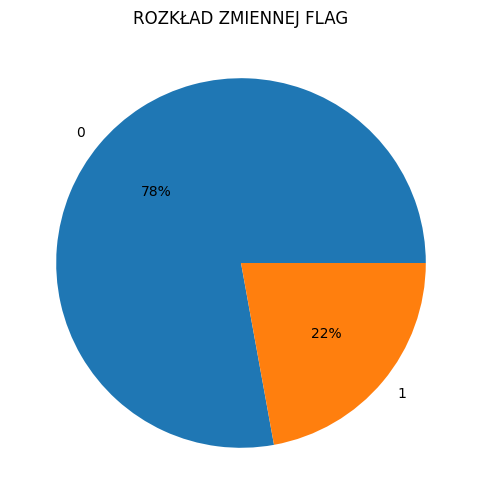

In [152]:
plt.figure(figsize=(6,6))
plt.pie(data['FLAG'].value_counts(),labels=data['FLAG'].value_counts().index, autopct='%.0f%%')
plt.title('ROZKŁAD ZMIENNEJ FLAG')
plt.show()

In [153]:
kat = data.select_dtypes('O').columns.astype('category')
data.drop(data[kat], axis=1, inplace=True)
data.fillna(data.median(), inplace=True)

In [154]:
data.isnull().sum()

FLAG                                                    0
Avg min between sent tnx                                0
Avg min between received tnx                            0
Time Diff between first and last (Mins)                 0
Sent tnx                                                0
Received Tnx                                            0
Number of Created Contracts                             0
Unique Received From Addresses                          0
Unique Sent To Addresses                                0
min value received                                      0
max value received                                      0
avg val received                                        0
min val sent                                            0
max val sent                                            0
avg val sent                                            0
min value sent to contract                              0
max val sent to contract                                0
avg value sent

In [155]:
# Usuniecie zmiennych które mają wariancję równą 0
zero = data.var() == 0
print(data.var()[zero])
print('\n')


data.drop(data.var()[zero].index, axis = 1, inplace = True)
print(data.var())
print(data.shape)

 ERC20 avg time between sent tnx        0.0
 ERC20 avg time between rec tnx         0.0
 ERC20 avg time between rec 2 tnx       0.0
 ERC20 avg time between contract tnx    0.0
 ERC20 min val sent contract            0.0
 ERC20 max val sent contract            0.0
 ERC20 avg val sent contract            0.0
dtype: float64


FLAG                                                    1.724110e-01
Avg min between sent tnx                                4.616718e+08
Avg min between received tnx                            5.327656e+08
Time Diff between first and last (Mins)                 1.042889e+11
Sent tnx                                                5.733918e+05
Received Tnx                                            8.851734e+05
Number of Created Contracts                             2.000685e+04
Unique Received From Addresses                          8.917457e+04
Unique Sent To Addresses                                6.960121e+04
min value received                                    

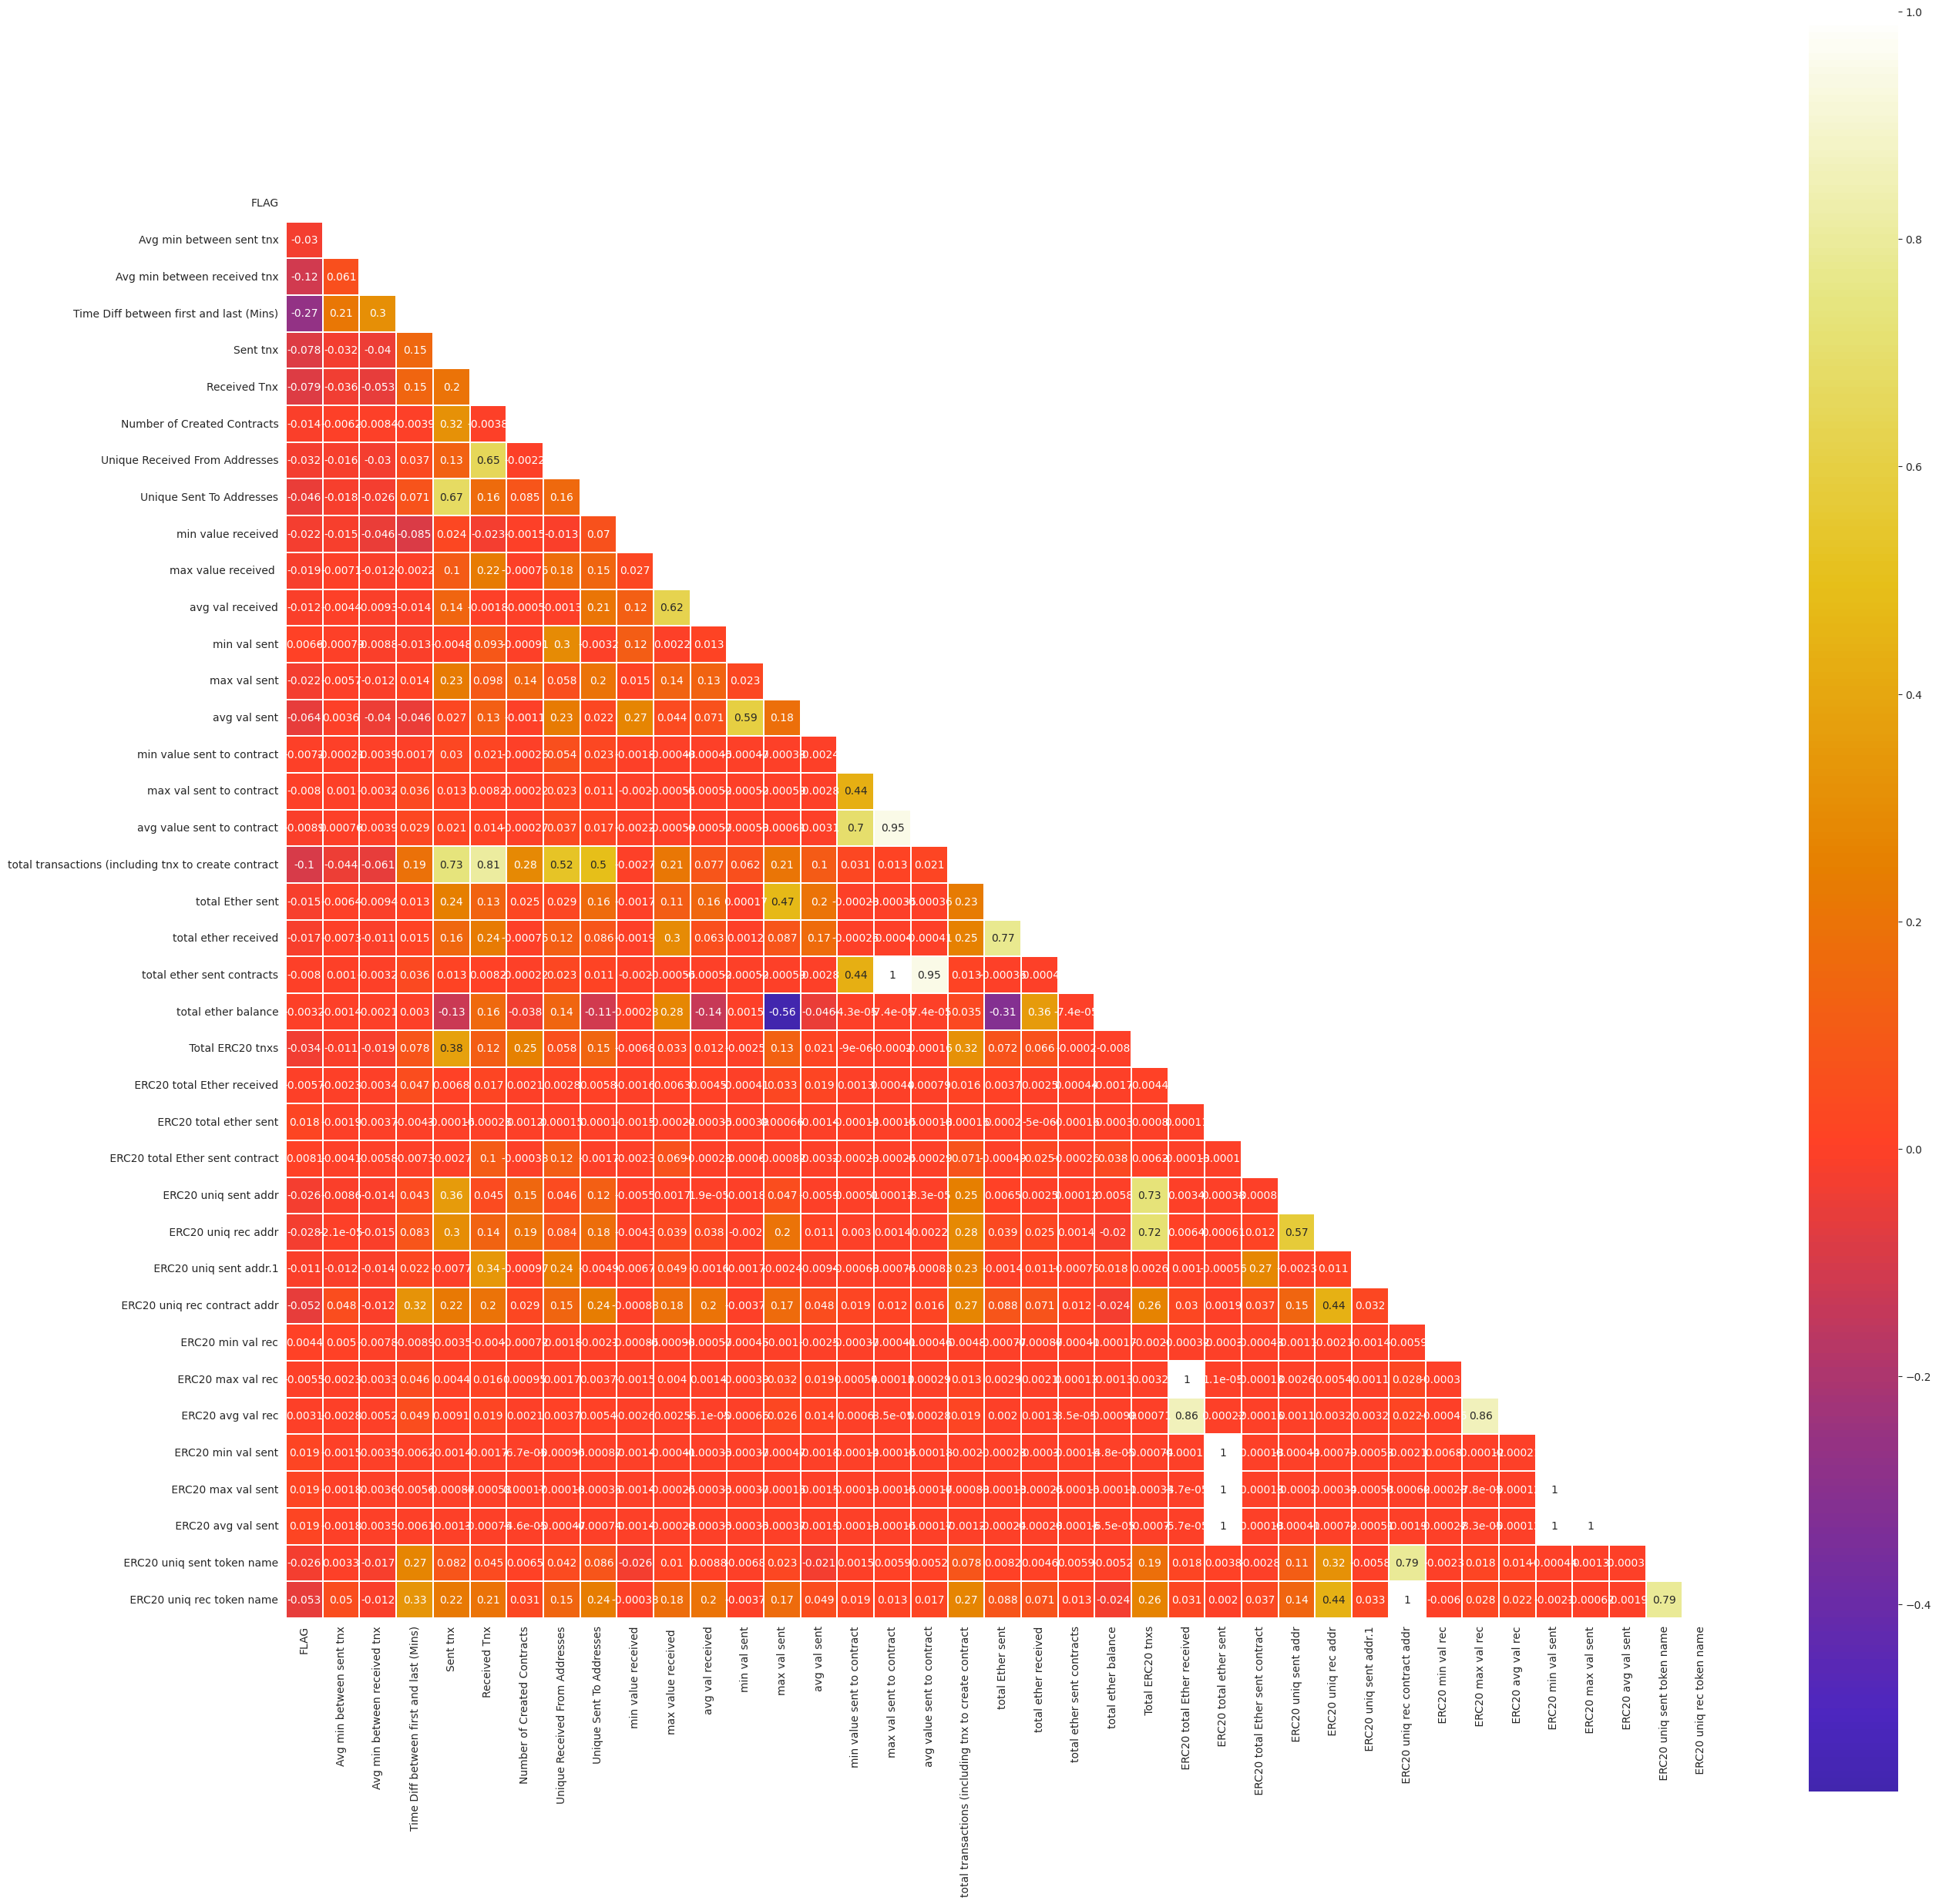

In [156]:
# Analiza istotności / korelacji danych
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(30,30))
    sns.heatmap(corr,  mask=mask, annot=True, cmap='CMRmap', center=0, linewidths=0.1, square=True)

In [157]:
drop = ['total transactions (including tnx to create contract',
        'total ether sent contracts',
        'max val sent to contract',
        ' ERC20 avg val rec',
        ' ERC20 avg val rec',
        ' ERC20 max val rec',
        ' ERC20 min val rec',
        ' ERC20 uniq rec contract addr',
        'max val sent',
        ' ERC20 avg val sent',
        ' ERC20 min val sent',
        ' ERC20 max val sent',
        ' Total ERC20 tnxs',
        'avg value sent to contract',
        'Unique Sent To Addresses',
        'Unique Received From Addresses',
        'total ether received',
        ' ERC20 uniq sent token name',
        'min value received',
        'min val sent',
        ' ERC20 uniq rec addr' ]
data.drop(drop, axis=1, inplace=True)

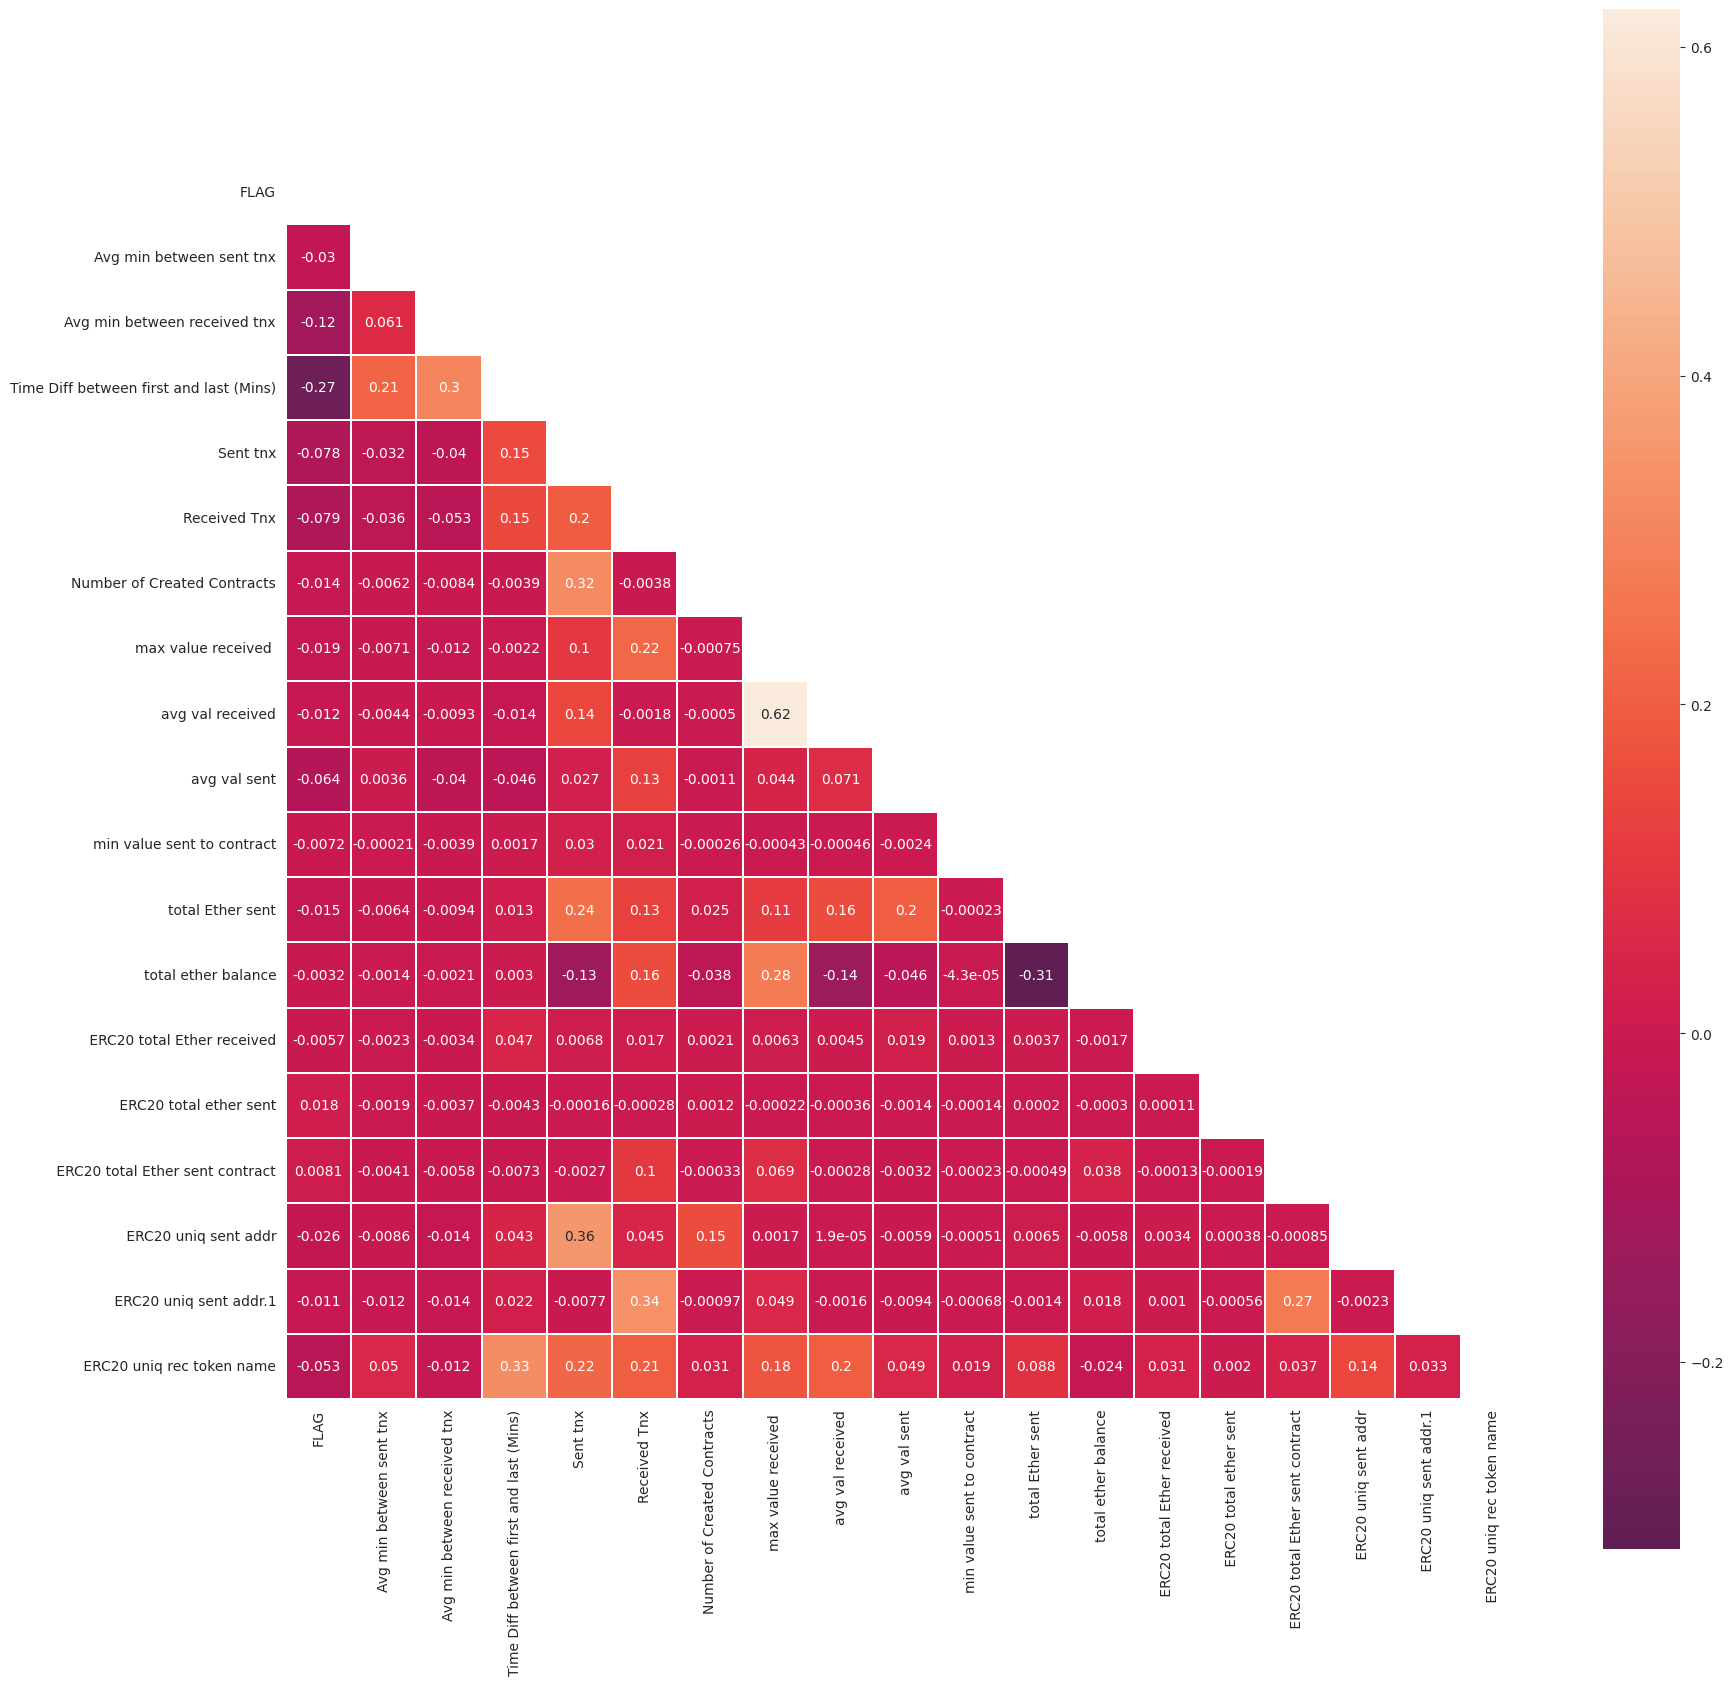

In [158]:
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
cmap = sns.color_palette("rocket", as_cmap=True)
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(20,20))
    sns.heatmap(corr,  mask=mask, annot=True, cmap=cmap, center=0, linewidths=0.2, square=True,annot_kws={"size": 10})

In [159]:
data.shape

(9841, 19)

In [160]:
y = data.iloc[:, 0]
X = data.iloc[:, 1:]
print(X.shape, y.shape)

(9841, 18) (9841,)


In [161]:
X_trening, X_test, y_trening, y_test = train_test_split(X, y, test_size = 0.2, random_state = 75)
print(X_trening.shape, y_trening.shape)
print(X_test.shape, y_test.shape)

(7872, 18) (7872,)
(1969, 18) (1969,)


In [162]:
scaler = StandardScaler()
scaler_train = scaler.fit_transform(X_trening)
scaler_data = pd.DataFrame(scaler_train, columns=X_trening.columns)
scaler_data

,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,max value received,avg val received,avg val sent,min value sent to contract,total Ether sent,total ether balance,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq sent addr.1,ERC20 uniq rec token name
0,-0.243015,-0.349723,-0.677425,-0.151057,-0.170955,-0.028279,-0.041493,-0.034280,-0.192030,-0.011272,-0.028907,-0.002491,-0.01278,-0.012448,-0.015657,-0.058682,-0.05032,-0.268279
1,-0.242917,-0.291940,-0.669153,-0.149715,-0.169871,-0.028279,-0.004412,0.057256,1.080453,-0.011272,-0.027406,-0.002491,-0.01278,-0.012448,-0.015657,-0.058682,-0.05032,-0.268279
2,-0.243015,0.889836,-0.057010,-0.152400,-0.164451,-0.018954,-0.040812,-0.033861,-0.196975,-0.011272,-0.028910,-0.002423,-0.01278,-0.012448,-0.015657,-0.058682,-0.05032,-0.148323
3,-0.242096,-0.349723,-0.677256,-0.148372,-0.170955,-0.028279,-0.034598,-0.003291,-0.051733,-0.011272,-0.028654,-0.002491,-0.01278,-0.012448,-0.015657,-0.058682,-0.05032,-0.268279
4,-0.243015,-0.349723,-0.677392,-0.151057,-0.170955,-0.028279,-0.041571,-0.034632,-0.196922,-0.011272,-0.028910,-0.002491,-0.01278,-0.012448,-0.015657,-0.058682,-0.05032,-0.268279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7867,-0.062412,-0.328791,-0.614925,-0.145686,-0.167703,-0.028279,-0.041483,-0.034413,-0.194497,-0.011272,-0.028903,-0.002491,-0.01278,-0.012448,-0.015657,-0.058682,-0.05032,-0.208301
7868,-0.243015,-0.276173,0.032537,-0.152400,-0.025701,-0.018954,-0.041503,-0.034536,-0.196975,-0.011272,-0.028910,-0.002321,-0.01278,-0.012448,-0.015657,-0.058682,-0.05032,-0.148323
7869,-0.053158,0.537122,0.483514,-0.100033,-0.160115,-0.028279,-0.039694,-0.032520,-0.178168,-0.011272,-0.028478,-0.002861,-0.01277,-0.012343,-0.015657,0.027291,-0.05032,0.691372
7870,-0.243015,-0.340071,-0.669837,-0.152400,-0.160115,-0.028279,-0.041227,-0.034289,-0.196975,-0.011272,-0.028910,-0.002443,-0.01278,-0.012448,-0.015657,-0.058682,-0.05032,-0.028366


In [163]:
oversample = SMOTE()
print(f'Kształt przed SMOTE: {scaler_train.shape, y_trening.shape}')

Kształt przed SMOTE: ((7872, 18), (7872,))


In [164]:
x_smote, y_smote = oversample.fit_resample(scaler_train, y_trening)
print(f'Kształt po SMOTE: {x_smote.shape, y_smote.shape}')

Kształt po SMOTE: ((12288, 18), (12288,))


In [165]:
legit = 0
fraud = 0

for i in y_trening:
    if i == 0:
        legit +=1
    else:
        fraud +=1

no = 0
yes = 1

for j in y_smote:
    if j == 0:
        no +=1
    else:
        yes +=1

print(f'Przed oversamplingiem \n \tlegit: {legit} \n \tfrauds: {fraud}')
print(f'Po oversamplingu \n \tlegit: {no} \n \tfrauds: {yes}')

Przed oversamplingiem 
 	legit: 6144 
 	frauds: 1728
Po oversamplingu 
 	legit: 6144 
 	frauds: 6145


In [166]:
#Pierwszy model, model regresji logistycznej
LR = LogisticRegression(random_state=70)
LR.fit(x_smote, y_smote)

trans_test = scaler.transform(X_test)

pred = LR.predict(trans_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [167]:
print(y_test.shape)
y_test.value_counts()

(1969,)


0    1518
1     451
Name: FLAG, dtype: int64

              precision    recall  f1-score   support

           0       0.93      0.53      0.68      1518
           1       0.35      0.86      0.50       451

    accuracy                           0.61      1969
   macro avg       0.64      0.70      0.59      1969
weighted avg       0.80      0.61      0.64      1969



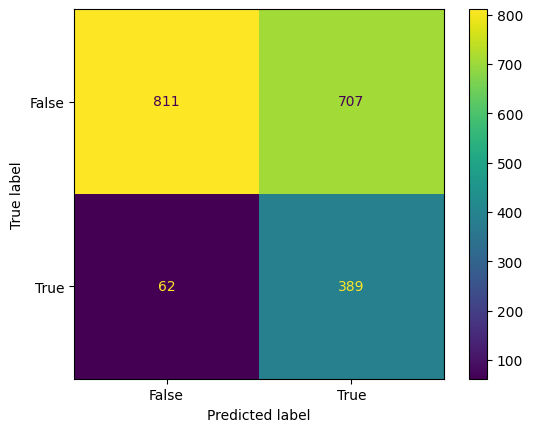

In [168]:
print(classification_report(y_test, pred))
confusion_matrix_ = confusion_matrix(y_test, pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_, display_labels = [False, True])
cm_display.plot()
plt.show()

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1518
           1       0.95      0.94      0.95       451

    accuracy                           0.98      1969
   macro avg       0.97      0.96      0.96      1969
weighted avg       0.98      0.98      0.98      1969



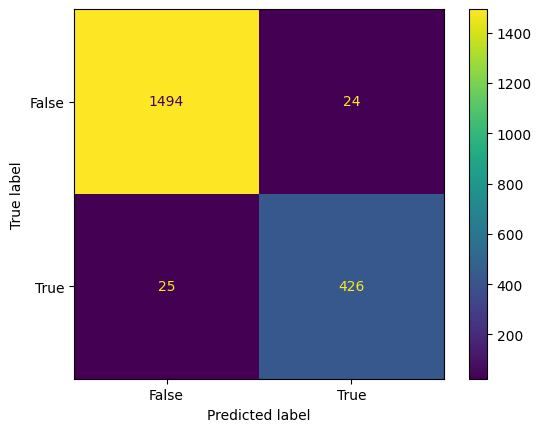

In [169]:
# Drugi model, las losowy
RF = RandomForestClassifier(random_state=70)
RF.fit(x_smote, y_smote)


scaler_test = scaler.transform(X_test)

pred = RF.predict(scaler_test)

print(classification_report(y_test, pred))
confusion_matrix_ = confusion_matrix(y_test, pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_, display_labels = [False, True])
cm_display.plot()
plt.show()

              precision    recall  f1-score   support

           0       0.97      0.92      0.95      1518
           1       0.78      0.92      0.84       451

    accuracy                           0.92      1969
   macro avg       0.88      0.92      0.90      1969
weighted avg       0.93      0.92      0.92      1969



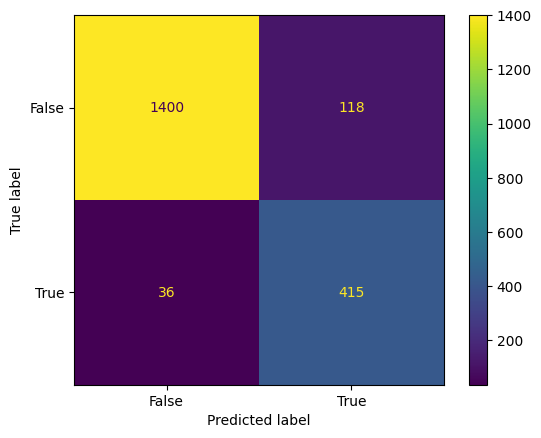

In [170]:
# Trzeci model, K-najbliższych sąsiadów
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(x_smote, y_smote)


scaler_test = scaler.transform(X_test)


pred = KNN.predict(scaler_test)


print(classification_report(y_test, pred))


confusion_matrix_ = confusion_matrix(y_test, pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_, display_labels=[False, True])
cm_display.plot()
plt.show()

Biorąc pod uwagę metryki precision, recall, f1-score oraz support oraz macierz błędów najlepszym modelem jest las losowy (Random Forest).

Wysoka precyzja jest cenna cechą, model ten posiada niski poziom fałszywych alarmów